**EDA ON F1 (2021 SEASON)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import pandas as pd

In [74]:
file='/content/drive/MyDrive/Data2021.csv'

df=pd.read_csv(file)


 **DESCRIPTIVE STATISTICS**

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Track          440 non-null    object 
 1   Position       440 non-null    object 
 2   No             440 non-null    int64  
 3   Driver         440 non-null    object 
 4   Team           440 non-null    object 
 5   Starting Grid  439 non-null    float64
 6   Laps           440 non-null    int64  
 7   Time           440 non-null    object 
 8   Points         440 non-null    float64
 9   +1Pt           440 non-null    object 
 10  Fastest Lap    403 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 37.9+ KB


In [77]:
df.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time,Points,+1Pt,Fastest Lap
0,Bahrain,1,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015
1,Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,1.0,56,0.745,18.0,No,1:33.228
2,Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,37.383,16.0,Yes,1:32.090
3,Bahrain,4,4,Lando Norris,McLaren Mercedes,7.0,56,46.466,12.0,No,1:34.396
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda,11.0,56,52.047,10.0,No,1:33.970


**Data Cleaning**

In [97]:
#Yuki Tsunoda has a missing value in the starting grid fill it with 16
# Locate the specific row for Yuki Tsunoda at Great Britain and update 'starting_grid'
df.loc[(df['Driver'] == 'Yuki Tsunoda') & (df['Track'] == 'Great Britain') & (df['Starting Grid'].isna()), 'Starting Grid'] = 16

# replacing 0 with all the N/A in the 'fastest lap'
df['Fastest Lap'] = df['Fastest Lap'].fillna(0)

In [80]:
# Check that Yuki Tsunoda's starting grid value is updated correctly or Not
print(df[(df['Driver'] == 'Yuki Tsunoda') & (df['Track'] == 'Great Britain')])

# Verify there are no missing values in 'fastest lap'
print("Missing values in 'fastest lap':", df['Fastest Lap'].isna().sum())


             Track Position  No        Driver              Team  \
189  Great Britain       10  22  Yuki Tsunoda  AlphaTauri Honda   

     Starting Grid  Laps    Time  Points +1Pt Fastest Lap  
189           16.0    52  82.065     1.0   No    1:30.826  
Missing values in 'fastest lap': 0


In [81]:
df.isnull().sum()

,0
Track,0
Position,0
No,0
Driver,0
Team,0
Starting Grid,0
Laps,0
Time,0
Points,0
+1Pt,0


**EDA on formula one 2021**

UNIVARIATE ANALYSIS

Univariate analysis helps us understand the distribution of individual variables, which can provide insights into the general characteristics of the data

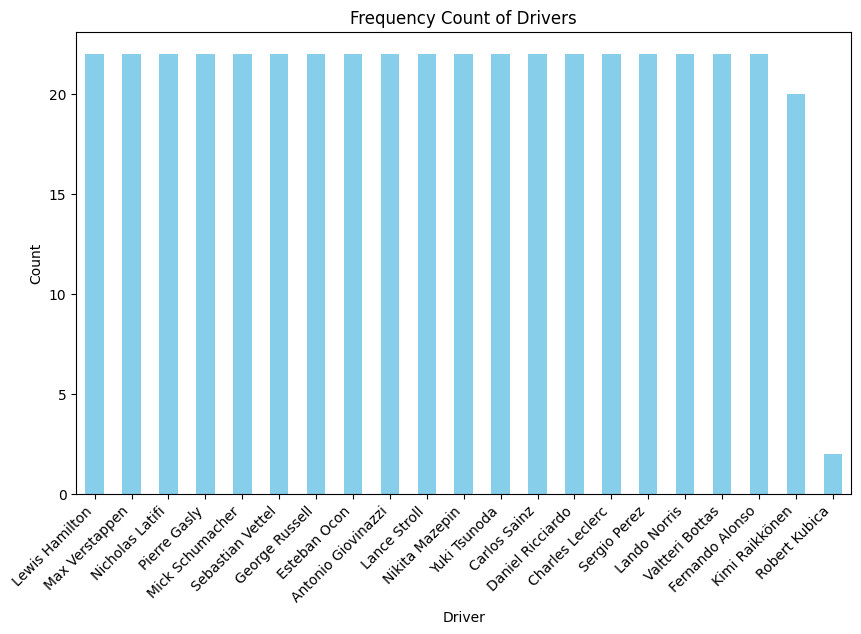

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming driver_counts is already calculated
driver_counts = df['Driver'].value_counts()
#print(driver_counts)
# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set figure size
driver_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Driver')
plt.ylabel('Count')
plt.title('Frequency Count of Drivers')

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



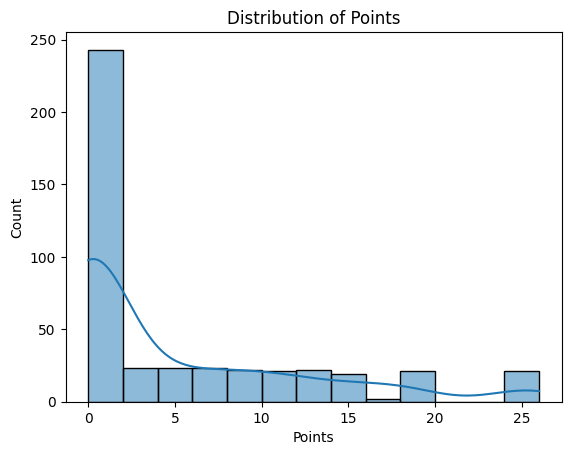

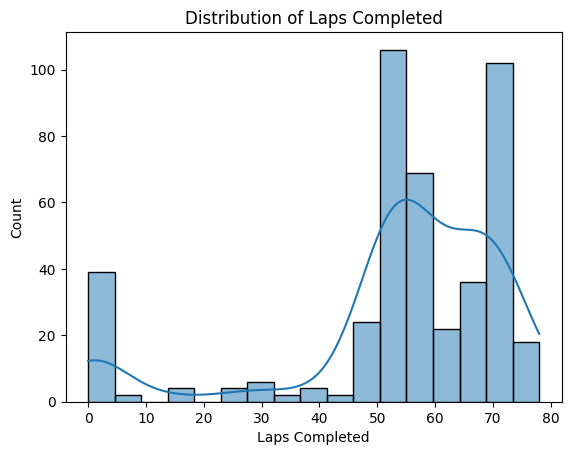

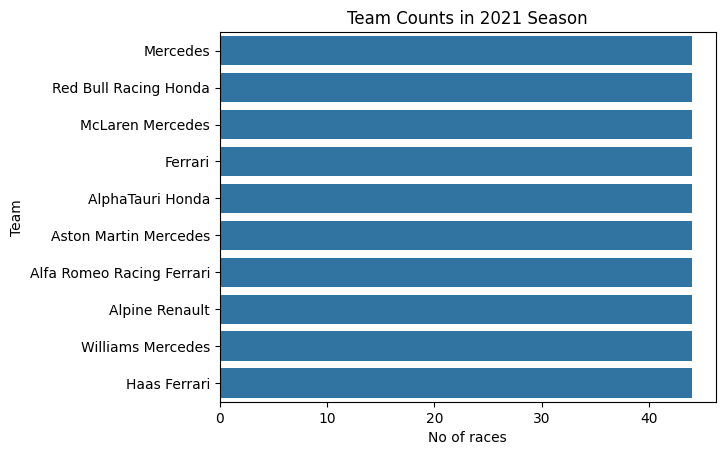

In [96]:
# Distribution of points
sns.histplot(df['Points'], kde=True)
plt.title('Distribution of Points')
plt.xlabel('Points')
#print(df['Points'].value_counts())
plt.show()


# Distribution of laps completed
sns.histplot(df['Laps'], kde=True)
plt.title('Distribution of Laps Completed')
plt.xlabel('Laps Completed')
#print(df['Laps'].value_counts())
plt.show()

# Count of each team
sns.countplot(y='Team', data=df, order=df['Team'].value_counts().index)
plt.title('Team Counts in 2021 Season')
plt.xlabel('No of races')
plt.ylabel('Team')
#print(df['Team'].value_counts())
plt.show()

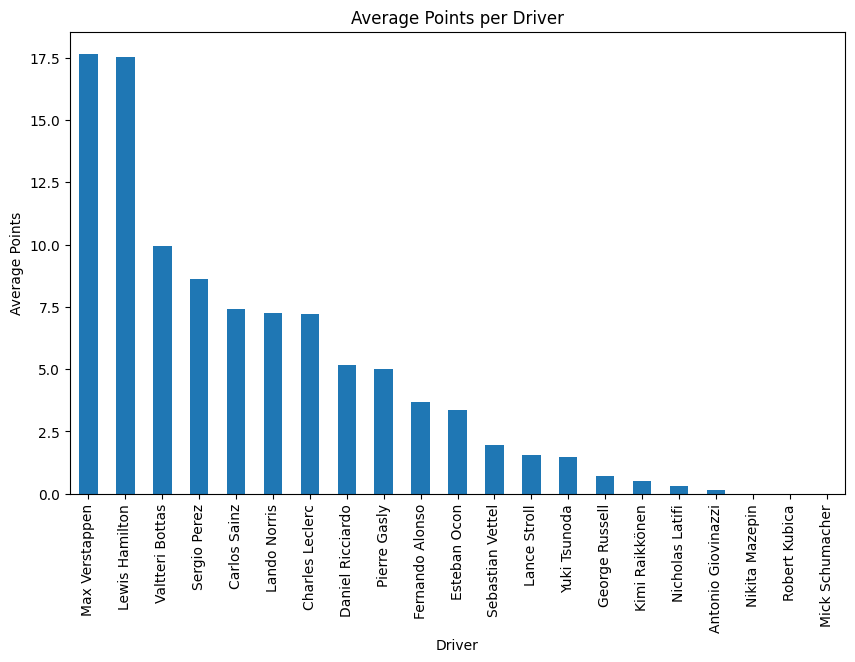

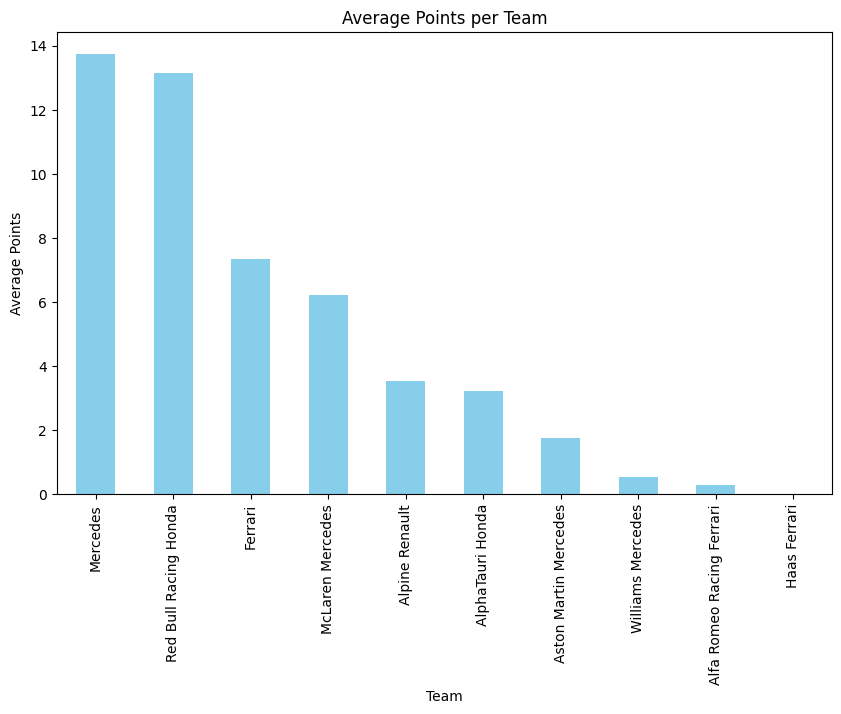

In [41]:
# Average points per driver
driver_points = df.groupby('Driver')['Points'].mean().sort_values(ascending=False)
driver_points.plot(kind='bar', figsize=(10, 6))
plt.title('Average Points per Driver')
plt.ylabel('Average Points')
plt.xlabel('Driver')
plt.show()

# Average points per team
team_points = df.groupby('Team')['Points'].mean().sort_values(ascending=False)
team_points.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Points per Team')
plt.ylabel('Average Points')
plt.xlabel('Team')
plt.show()

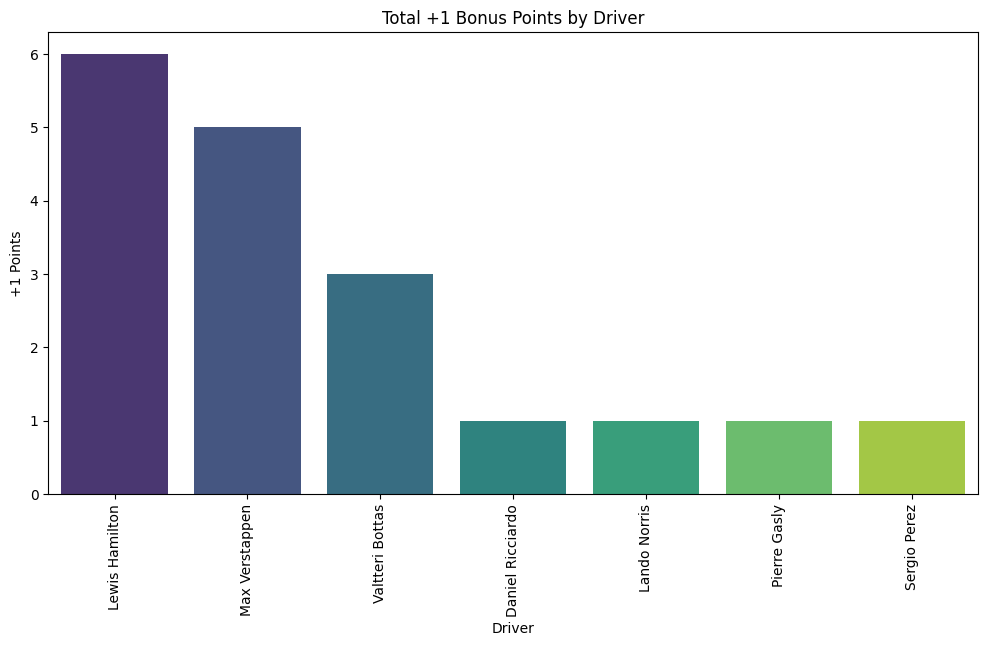

In [69]:
# Filter and count +1 points per driver
bonus_points = df[df['+1Pt'] == "Yes"].groupby('Driver').size().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=bonus_points.index, y=bonus_points.values, hue=bonus_points.index, palette='viridis', legend=False)
plt.title('Total +1 Bonus Points by Driver')
plt.xlabel('Driver')
plt.ylabel('+1 Points')
plt.xticks(rotation=90)
plt.show()


**BIVARIATE ANALYSIS**

Bivariate analysis lets us explore how two variables relate to each other

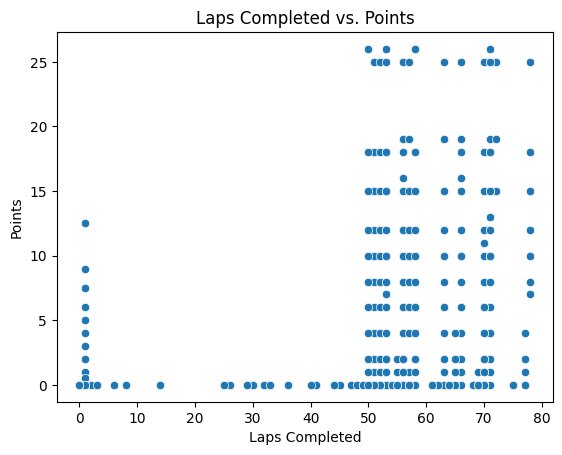

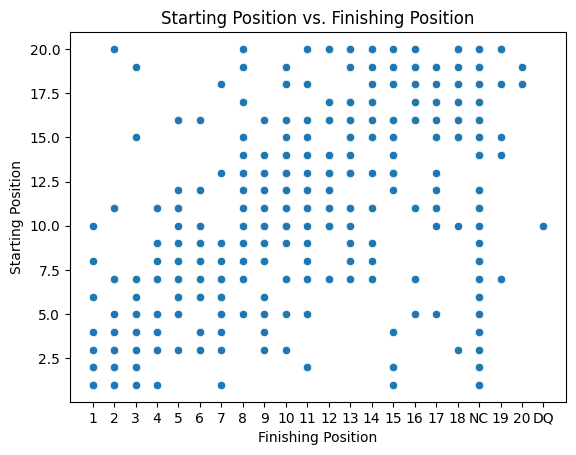

In [40]:
# Scatter Plot: Laps Completed vs. Points
sns.scatterplot(x='Laps', y='Points', data=df)
plt.title('Laps Completed vs. Points')
plt.xlabel('Laps Completed')
plt.ylabel('Points')
plt.show()

# Scatter Plot: Starting Position vs. Finishing Position
sns.scatterplot(y='Starting Grid', x='Position', data=df)
plt.title('Starting Position vs. Finishing Position')
plt.ylabel('Starting Position')
plt.xlabel('Finishing Position')
plt.show()


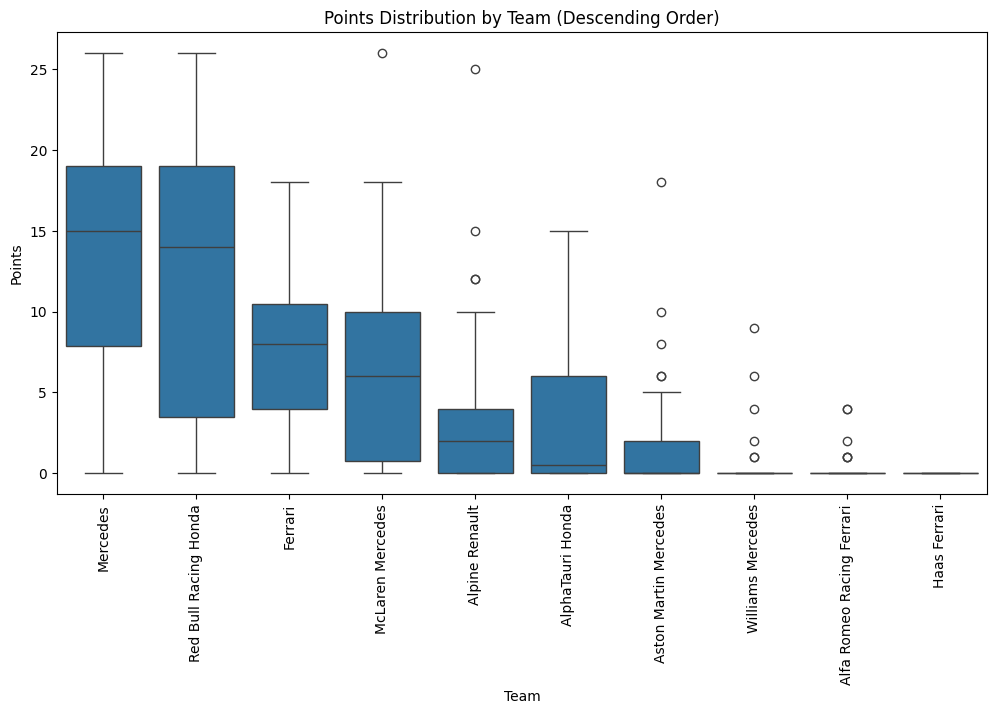

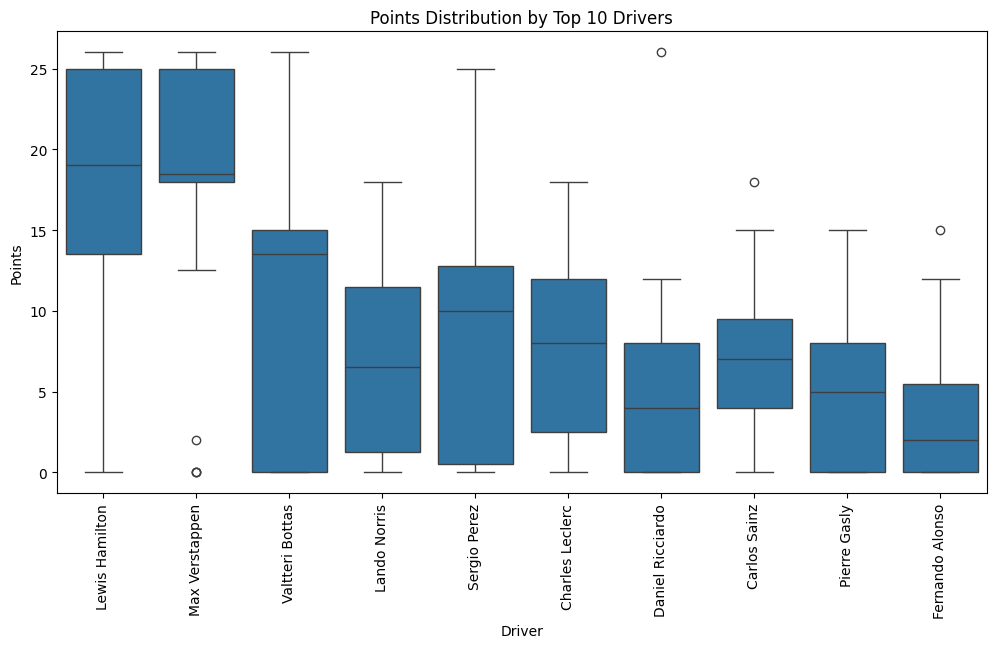

In [52]:
# Calculate mean points per team and sort in descending order
team_order = df.groupby('Team')['Points'].mean().sort_values(ascending=False).index

# Box Plot: Points per Team in descending order
plt.figure(figsize=(12, 6))
sns.boxplot(x='Team', y='Points', data=df, order=team_order)
plt.xticks(rotation=90)
plt.title('Points Distribution by Team (Descending Order)')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()



# Filter to top 10 drivers by total points scored
top_drivers = df.groupby('Driver')['Points'].sum().nlargest(10).index

# Plot a box plot for points distribution by top 10 drivers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Driver', y='Points', data=df[df['Driver'].isin(top_drivers)])
plt.xticks(rotation=90)
plt.title('Points Distribution by Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.show()



**MULTIVARIATE ANALYSIS**

Multivariate analysis examines the relationships between more than two variables. This can be useful for uncovering complex interactions, such as the combined effect of teams, drivers, and laps completed on points scored.

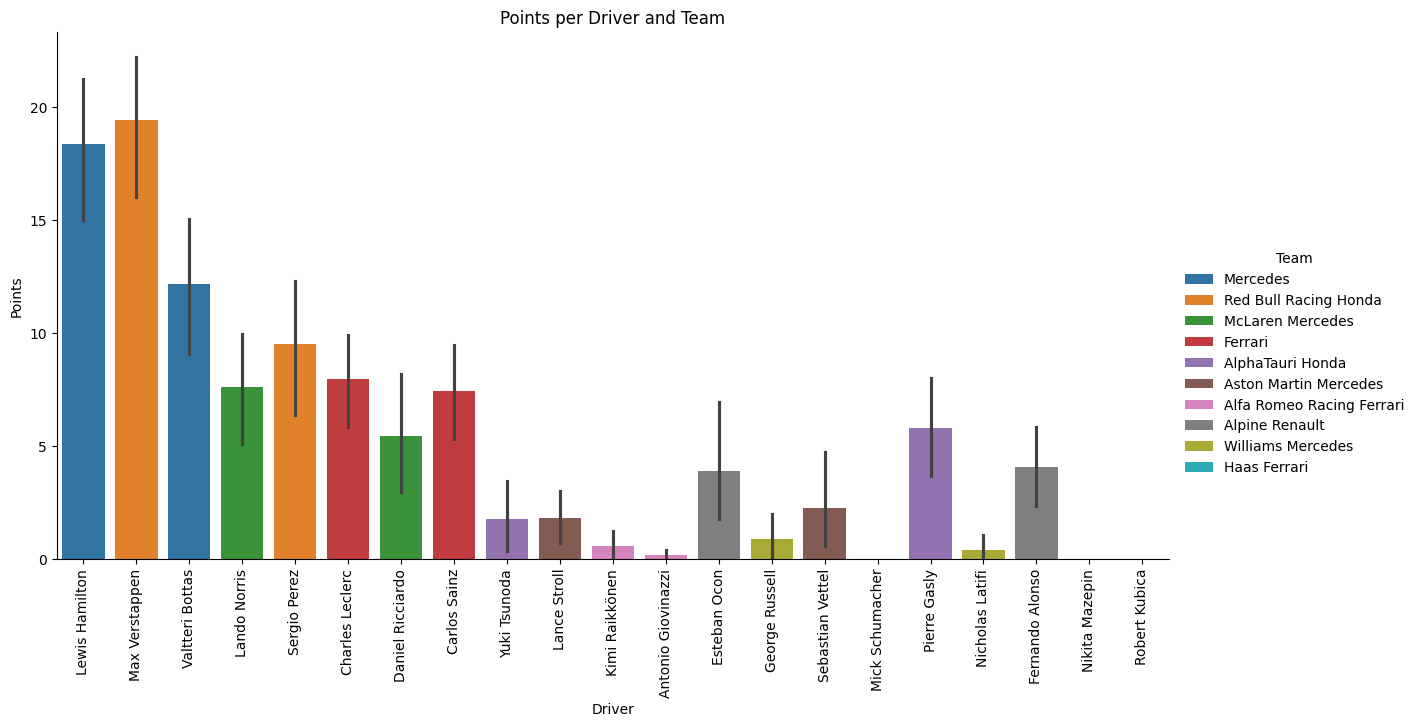

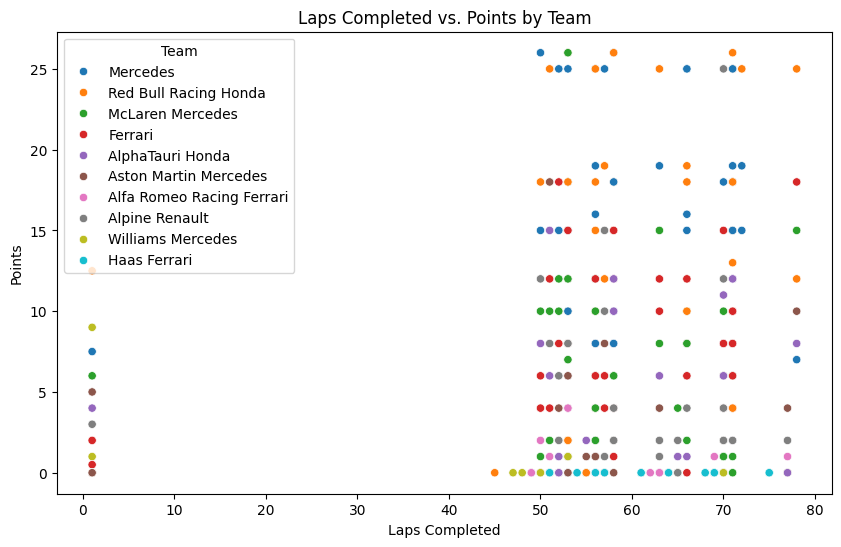

In [61]:
# Points per driver and team
sns.catplot(x='Driver', y='Points', hue='Team', data=df, kind='bar', height=6, aspect=2)
plt.title('Points per Driver and Team')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of laps completed vs points, colored by team
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Laps', y='Points', hue='Team', data=df)
plt.title('Laps Completed vs. Points by Team')
plt.xlabel('Laps Completed')
plt.ylabel('Points')
plt.legend(title='Team')
plt.show()


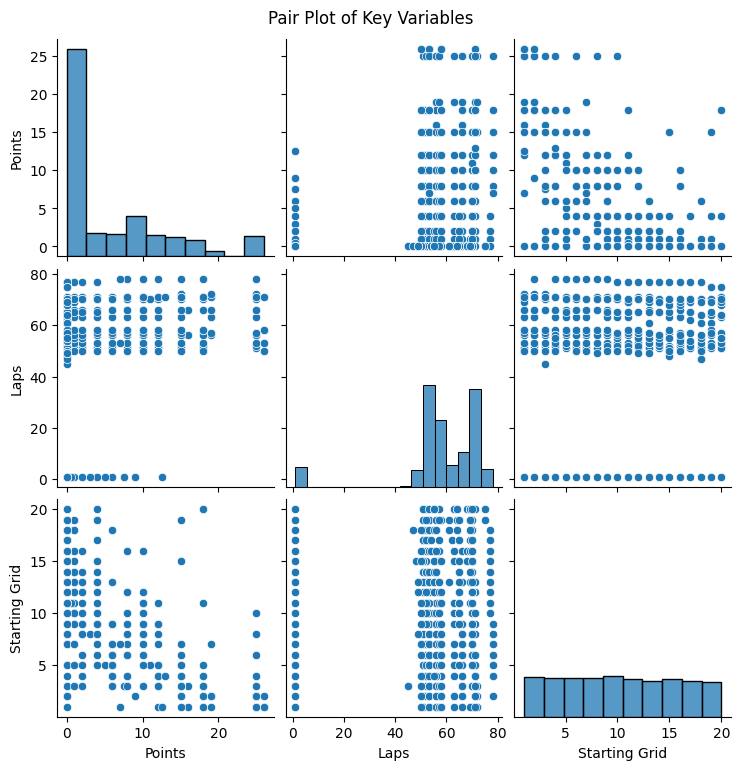

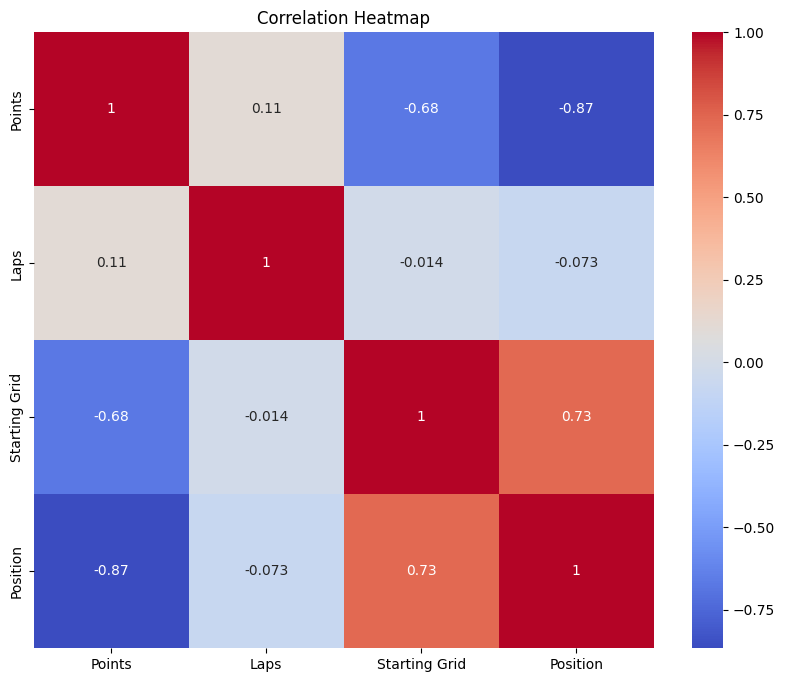

In [60]:
# Pair Plot: Visualizing relationships between multiple numeric variables
sns.pairplot(df[['Points', 'Laps', 'Starting Grid', 'Position']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

# Replace 'NC', 'DQ', and other non-numeric entries with NaN
df[['Points', 'Laps', 'Starting Grid', 'Position']] = df[['Points', 'Laps', 'Starting Grid', 'Position']].replace(['NC', 'DQ'], pd.NA)

# Drop rows with NaN values in these columns
df.dropna(subset=['Points', 'Laps', 'Starting Grid', 'Position'], inplace=True)

# Alternatively, you could fill NaNs with 0 if that makes sense for your analysis:
# df[['Points', 'Laps', 'Starting Grid', 'Position']].fillna(0, inplace=True)

# Now, plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Points', 'Laps', 'Starting Grid', 'Position']].astype(float).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


